In [1]:
%load_ext autoreload
%autoreload 1
from learning import trace
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from utils import *
from settings import *

In [7]:
input_string = "bark"  # Input string
slice_num = 11 + 7 * (len(input_string)-1) # Number of time slices

input_indices = get_input_indices(slice_num, input_string)

In [8]:
%prun feature_values_agg, phoneme_values_agg, word_values_agg = trace(input_string)

         513274 function calls (512704 primitive calls) in 3.531 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
      217    0.914    0.004    0.987    0.005 {built-in method time.sleep}
      351    0.466    0.001    0.466    0.001 {method 'poll' of 'select.poll' objects}
       32    0.299    0.009    0.930    0.029 learning.py:141(word_layer_update_delta)
       96    0.273    0.003    0.506    0.005 cloudpickle.py:338(_find_imported_submodules)
   150976    0.256    0.000    0.256    0.000 {method 'startswith' of 'str' objects}
    21088    0.121    0.000    0.121    0.000 _methods.py:98(_clip)
    21120    0.107    0.000    0.366    0.000 fromnumeric.py:51(_wrapfunc)
    20960    0.099    0.000    0.219    0.000 {method 'clip' of 'numpy.generic' objects}
    21088    0.096    0.000    0.462    0.000 fromnumeric.py:2241(clip)
    39936    0.062    0.000    0.062    0.000 learning.py:198(<lambda>)
    31040    0.057    

Text(0, 0.5, 'Time slices of feature activations')

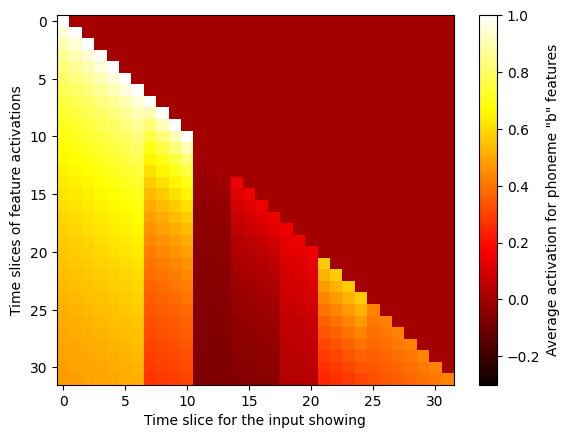

In [9]:
# Make a visualization of feature activations over time, choosing units responding to the first phoneme 'b'
avg_b_responses = np.zeros((slice_num, slice_num), dtype=np.float64)
for t in range(slice_num):
    feature_vals = feature_values_agg[t]
    b_features = PHONEMIC_FEATURES['b']
    response = 0.0
    for f_idx, feature in enumerate(b_features):
        if feature == -1:
            continue
        response += feature_vals[:, f_idx, feature]
    avg_b_responses[t] = response / (7 - np.sum(b_features == -1))
plt.imshow(avg_b_responses, aspect='auto', cmap='hot')
plt.colorbar(label='Average activation for phoneme "b" features')
plt.clim(L, U)
plt.xlabel('Time slice for the input showing')
plt.ylabel('Time slices of feature activations')


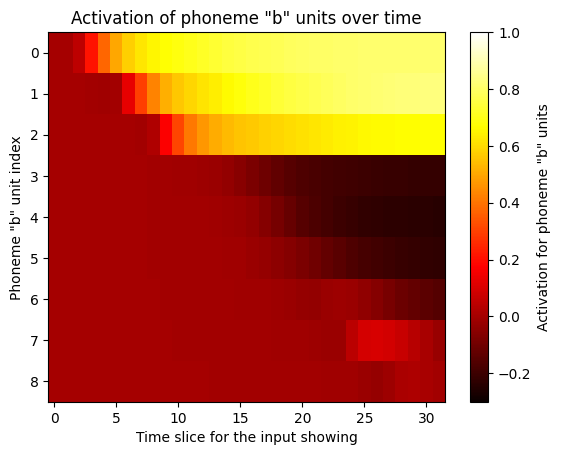

In [10]:
b_phoneme_responses = np.zeros((slice_num, phoneme_values_agg[0].shape[1]), dtype=np.float64)
for t in range(slice_num):
    phoneme_vals = phoneme_values_agg[t]
    b_phoneme_idx = PHONEMES.index('b')
    b_phoneme_responses[t] = phoneme_vals[b_phoneme_idx]
plt.figure()
plt.imshow(b_phoneme_responses.T, aspect='auto', cmap='hot')
plt.colorbar(label='Activation for phoneme "b" units')
plt.clim(L, U)
plt.ylabel('Phoneme "b" unit index')
plt.xlabel('Time slice for the input showing')
plt.title('Activation of phoneme "b" units over time')
plt.show()

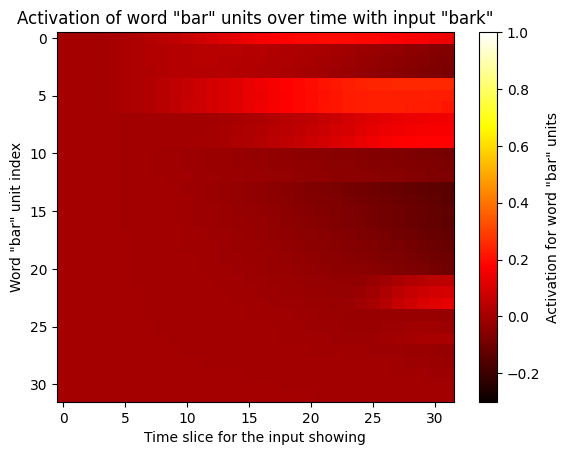

(32,)


,Time,Max Activation Word,Probability
9,9,bark,0.039510
8,8,bark,0.038317
6,6,bark,0.038167
5,5,bark,0.037834
4,4,bark,0.037830
7,7,bark,0.037429
0,0,bark,0.037210
23,23,bark,0.036023
22,22,bark,0.035120
21,21,bark,0.033876


In [11]:
word_responses = np.zeros((slice_num, word_values_agg[0].shape[0]), dtype=np.float64)
word = "bar"
for t in range(slice_num):
    word_vals = word_values_agg[t]
    word_responses[t] = word_vals[:, WORD_TO_IND[word]]
plt.figure()
plt.imshow(word_responses.T, aspect='auto', cmap='hot')
plt.colorbar(label=f'Activation for word "{word}" units')
plt.clim(L, U)
plt.ylabel(f'Word "{word}" unit index')
plt.xlabel('Time slice for the input showing')
plt.title(f'Activation of word "{word}" units over time with input "{input_string}"')
plt.show()

max_activation_word_indices = np.argmax(word_values_agg[-1], axis=1)
activations = []
for i in range(slice_num):
    activations.append(word_values_agg[-1][i, max_activation_word_indices[i]])
activations = np.array(activations)
probs = np.exp(activations) / np.sum(np.exp(activations))
print(probs.shape)
words = [KNOWN_WORDS[idx] for idx in max_activation_word_indices]
time = list(range(slice_num))
words_df = pd.DataFrame({'Time': time, 'Max Activation Word': words, 'Probability': probs})
words_df = words_df.sort_values(by='Probability', ascending=False)
words_df